In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [63]:
obs = 12
np.random.seed(15)
data = np.random.randint(0,5, obs*5).reshape(obs,5)
data_unique = np.unique(data, axis=0)
xs = np.c_[np.ones([data_unique.shape[0]]), data_unique] 
ys = np.random.choice(list(range(1,10)), obs)
ys.resize(obs,1)

xs.shape

(12, 6)

In [64]:
xs[:4]

array([[1., 0., 3., 0., 4., 3.],
       [1., 0., 4., 0., 4., 3.],
       [1., 1., 0., 0., 4., 0.],
       [1., 1., 2., 0., 0., 0.]])

In [65]:
ys[:4]

array([[1],
       [8],
       [7],
       [5]])

In [66]:
weights = lambda ins, outs: np.random.randn(ins, outs)

In [79]:
ins = 5
outs = 1
nodes = 15

wi = weights(ins+1, nodes)
ws = weights(nodes, outs) 
err = []

In [80]:
for i in range(10000):
    x = xs @ wi
    x = np.sin(x)
    yh = x @ ws
    e = (yh - ys) * 1
#     print(f'x = {x.shape}')
#     print(f'e = {e.shape}')
#     print(f'ws = {ws.shape}')
    ws -= (x.T @ e) * .03
    e = np.sum(np.abs(e))
    if e < .05:
        print('we have converged after {} iterations'.format(i))
        print(ws)
        break
    err.append(e)

we have converged after 586 iterations
[[ 3.59701023]
 [-0.36089581]
 [ 3.34489862]
 [-0.44363406]
 [ 0.30957942]
 [ 1.99636218]
 [-3.13011056]
 [ 5.61814666]
 [-3.28872102]
 [-3.65773615]
 [ 2.13817242]
 [-0.19779962]
 [-2.9496622 ]
 [-1.02012217]
 [-0.51894159]]


In [81]:
len(err), min(err)

(586, 0.05024285144443885)

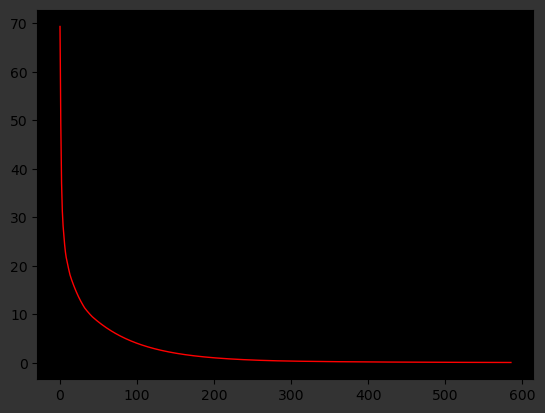

In [82]:
plt.axes().set_facecolor('black')
plt.plot(err,color='red', linewidth=1)
plt.show()

In [83]:
yh

array([[1.00287452],
       [7.99688913],
       [6.99846477],
       [5.00052628],
       [4.99543364],
       [4.00116029],
       [8.00247839],
       [6.00053274],
       [6.99882003],
       [1.01295732],
       [1.01411902],
       [4.99511134]])

In [84]:
ys

array([[1],
       [8],
       [7],
       [5],
       [5],
       [4],
       [8],
       [6],
       [7],
       [1],
       [1],
       [5]])

In [88]:
a, b, c, d = -20, 3, 5, 6

In [89]:
a*(b+c) + b*(c+d)

-127

In [90]:
a*b + a*c + b*c + b*d

-127

In [91]:
-3 * (b - 5)

6

In [92]:
3 * (-b + 5)

6